# Pyber Analysis

1. The "Pyber Sharing Data (2016)" bubble plot does not appear to display a relationship among the three city types in terms of average fare and driver count although the bubble sizes do show a higher driver count in urban areas over the rural a nd suburban city types. 

2. The 3 pie charts displaying total drivers, rides, and fares by city type give the a visual representation of how the urban city type dominates in its share of fares, rides, and drivers as one can expect. Urban areas tend to support much larger and denser populations than suburban and rural areas  where people are  typically sparsley populated, hence lower demand and driver employment rates in the former two city types. 

3. The pie charts show a slightly larger share in total fares for rural areas in contrast to its representation in total rides and total drivers. The higher share in rural total fares can be perhaps be becuase rural drivers only make up 2.6% of the total drivers pie chart. This lack of driver supply may be driving a higher fare. Another reason could be because rural areas may require drivers to drive longer distances than urban or suburban centers due to its typically larger geographical natures therefore causing a slightly higher total fare representation.  

In [93]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
city_data = "downloads/city_data.csv"
ride_data = "downloads/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data)
city_data_df.head()

ride_data_df = pd.read_csv(ride_data)
ride_data_df.head()

# Combine the data into a single dataset
pyber_data = pd.merge(city_data_df, ride_data_df, on="city")
pyber_data.head()

# Display the data table for preview

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [72]:
# Obtain the x and y coordinates for each of the three city types

#Average fare per city
average_fare = pyber_data.groupby("city")["fare"].mean()
average_fare

city
Amandaburgh             24.641667
Barajasview             25.332273
Barronchester           36.422500
Bethanyland             32.956111
Bradshawfurt            40.064000
Brandonfort             35.437368
Carriemouth             28.314444
Christopherfurt         24.501852
Colemanland             30.894545
Davidfurt               31.995882
Deanville               25.842632
East Aaronbury          25.661111
East Danielview         31.560588
East Kaylahaven         23.757931
East Kentstad           29.823077
East Marymouth          30.835185
Erikaland               24.906667
Garzaport               24.123333
Grahamburgh             25.221200
Grayville               27.763333
Harringtonfort          33.470000
Huntermouth             28.993750
Hurleymouth             25.891429
Jerryton                25.649200
Jessicaport             36.013333
Johnton                 26.785714
Joneschester            22.289600
Josephside              32.858148
Justinberg              23.694333
Karenberg

In [73]:
#Total rides per city

total_rides = pyber_data.groupby("city")["ride_id"].count()
total_rides

city
Amandaburgh             18
Barajasview             22
Barronchester           16
Bethanyland             18
Bradshawfurt            10
Brandonfort             19
Carriemouth             27
Christopherfurt         27
Colemanland             22
Davidfurt               17
Deanville               19
East Aaronbury           9
East Danielview         17
East Kaylahaven         29
East Kentstad           13
East Marymouth          27
Erikaland               12
Garzaport                3
Grahamburgh             25
Grayville               15
Harringtonfort           6
Huntermouth             24
Hurleymouth             28
Jerryton                25
Jessicaport              6
Johnton                 21
Joneschester            25
Josephside              27
Justinberg              30
Karenberg               17
                        ..
South Evanton           31
South Jack              19
South Jennifer           7
South Karenland         38
South Latoya            19
South Marychester      

In [74]:
#Total drivers per city

total_drivers = pyber_data.groupby("city")["driver_count"].mean()
total_drivers

city
Amandaburgh             12
Barajasview             26
Barronchester           11
Bethanyland             22
Bradshawfurt             7
Brandonfort             10
Carriemouth             52
Christopherfurt         41
Colemanland             23
Davidfurt               23
Deanville               49
East Aaronbury           7
East Danielview         22
East Kaylahaven         65
East Kentstad           20
East Marymouth           5
Erikaland               37
Garzaport                7
Grahamburgh             61
Grayville                2
Harringtonfort           4
Huntermouth             37
Hurleymouth             36
Jerryton                64
Jessicaport              1
Johnton                 27
Joneschester            39
Josephside              25
Justinberg              39
Karenberg               22
                        ..
South Evanton           11
South Jack              46
South Jennifer           7
South Karenland          4
South Latoya            10
South Marychester      

In [75]:
#City Types
city_type = city_data_df.set_index('city')['type']
city_type.value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [76]:
pyber_cities = pd.DataFrame({"Average Fare per City":average_fare,
                 "Number of Rides": total_rides,
                 "Number of Drivers": total_drivers,
                 "City Type": city_type
})
pyber_cities.head()

,Average Fare per City,Number of Rides,Number of Drivers,City Type
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


# Bubble Plot of Ride Sharing Data

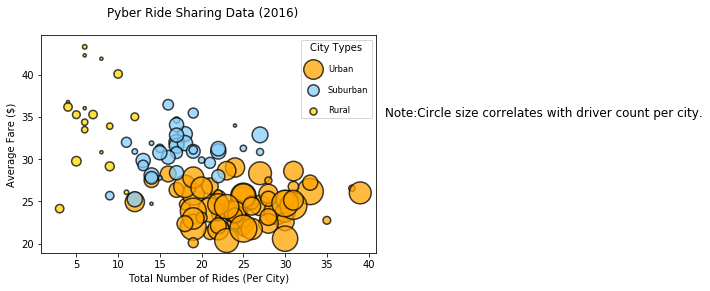

In [77]:
#Data Frames for each city type
urban = pyber_cities.loc[pyber_cities["City Type"]== "Urban"]
suburban = pyber_cities.loc[pyber_cities["City Type"]== "Suburban"]
rural = pyber_cities.loc[pyber_cities["City Type"]== "Rural"]

#Scatter plots for city types
plt.scatter(urban["Number of Rides"], urban["Average Fare per City"], color = "orange", edgecolors="black", s = urban["Number of Drivers"]*10, label = "Urban", alpha = 0.75,linewidth=1.5)
plt.scatter(suburban["Number of Rides"], suburban["Average Fare per City"], color = "lightskyblue", edgecolors ="black", s = suburban["Number of Drivers"]*10, label = "Suburban", alpha = 0.75, linewidth = 1.5)
plt.scatter(rural["Number of Rides"], rural["Average Fare per City"], color = "gold", edgecolors = "black", s = rural["Number of Drivers"]*10, label = "Rural", alpha = 0.75, linewidth = 1.5)

#Title, x and y coordinates for each city type
plt.suptitle("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

#Incorporate a text label regarding circle size
plt.text(42, 35,"Note:Circle size correlates with driver count per city.",fontsize='large')

#Create Legend
plt.legend(loc= "best", title="City Types", fontsize='small',fancybox=True, labelspacing=1.4)

#Save Figure
plt.savefig("Documents/Pyber Ride Sharing.png")

#Show plot
plt.show()

# Total Fares by City Type

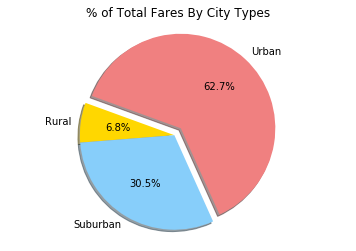

In [78]:
# Calculate Total Fare by City Type
total_fare = pyber_data.groupby(['type'])['fare'].sum()

# Labels
labels = ["Rural","Suburban","Urban" ]

# Colors
colors = ["gold","lightskyblue","lightcoral"]

explode = (0, 0, 0.1)
plt.title("% of Total Fares By City Types")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")

# Save Figure
plt.savefig("Documents/% of Total Fares By City Types.png")

# Show Figure
plt.show()

# Total Rides by City Types

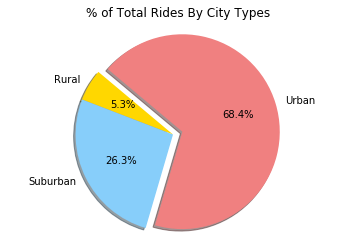

In [79]:
# Calculate Total Fare by City Type
total_rides = pyber_data.groupby(['type'])['ride_id'].count()

# Labels
labels = ["Rural","Suburban","Urban" ]

# Colors
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Rides By City Types")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

# Save Figure
plt.savefig("Documents/% of Total Rides By City Types.png")

# Show Figure
plt.show()

# Total Drivers by City Type

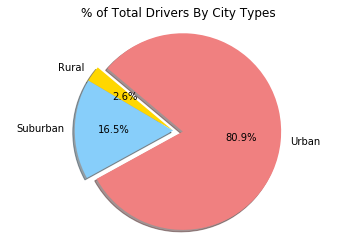

In [92]:
# Calculate Total Drivers by City Type
total_drivers = city_data_df.groupby(['type'])['driver_count'].sum()

# Labels
labels = ["Rural","Suburban","Urban" ]

# Colors
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Drivers By City Types")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

# Save Figure
plt.savefig("Documents/% of Total Drivers By City Types.png")

# Show Figure
plt.show()